<a href="https://colab.research.google.com/github/nevetto/RockPaperScissorsClassification/blob/main/ROCKPAPERSCISSORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# pip install tensorflow tensorflow-datasets

In [3]:
# IMPORT NECESSARY LIBRARIES

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

In [5]:
# HOW TO FIND TENSORFLOW DATASETS

In [6]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview

tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [7]:
# get information on data
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

In [8]:
from re import split
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteFA4YHI/rock_paper_scissors-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteFA4YHI/rock_paper_scissors-test.tfrecord
Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [9]:
# SHOW EXAMPLES

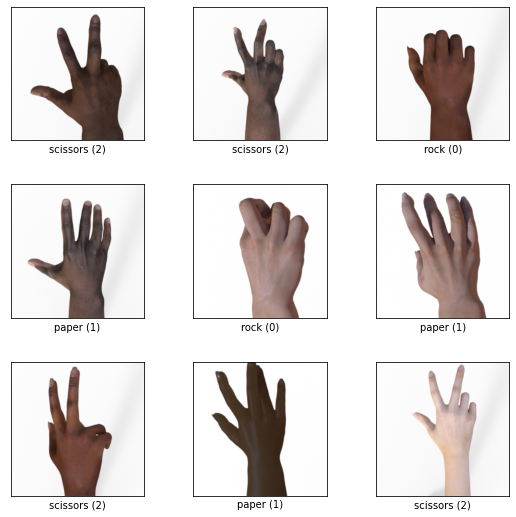

In [10]:
fig = tfds.show_examples(ds_train, info)

In [11]:
# ADDITIONAL DATA PREP

In [12]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [13]:
# type(train_images[0])
# train_images.shape

In [14]:
train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1)
# train_images.dtype
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images/= 255
test_images/= 255

In [15]:
train_images.dtype

dtype('float32')

In [16]:
train_images[0].shape

(300, 300, 1)

In [17]:
# TRAIN A NETWORK

In [18]:
from threading import active_count
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512,activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images,train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 4s 16ms/step - loss: 30.3535 - accuracy: 0.4333
Epoch 2/5
79/79 [==============================] - 1s 16ms/step - loss: 1.3306 - accuracy: 0.6452
Epoch 3/5
79/79 [==============================] - 1s 16ms/step - loss: 1.1002 - accuracy: 0.6762
Epoch 4/5
79/79 [==============================] - 1s 15ms/step - loss: 0.5050 - accuracy: 0.8159
Epoch 5/5
79/79 [==============================] - 1s 16ms/step - loss: 0.5094 - accuracy: 0.8155


In [19]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 1.8984 - accuracy: 0.4597


[1.898363709449768, 0.45967742800712585]

In [20]:
model= keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300, 300, 1)),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')
  ])

model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images,train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 24s 170ms/step - loss: 5.7218 - accuracy: 0.5210
Epoch 2/5
79/79 [==============================] - 12s 156ms/step - loss: 1.0299 - accuracy: 0.4341
Epoch 3/5
79/79 [==============================] - 12s 156ms/step - loss: 1.0988 - accuracy: 0.3333
Epoch 4/5
79/79 [==============================] - 12s 157ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 5/5
79/79 [==============================] - 12s 158ms/step - loss: 1.0987 - accuracy: 0.3333


In [21]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 102ms/step - loss: 1.0987 - accuracy: 0.3333


[1.09865140914917, 0.3333333432674408]

In [22]:
# IMPROVING THE MODEL

In [23]:
model= keras.Sequential([
  keras.layers.AveragePooling2D(6,3, input_shape=(300, 300, 1)),
  keras.layers.Conv2D(64, 3, activation='relu',),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  # keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  # keras.layers.Dense(128, activation='relu'),    not improoving the model
  keras.layers.Dense(3, activation='softmax')
  ])

model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images,train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 3s 27ms/step - loss: 0.6064 - accuracy: 0.7750
Epoch 2/5
79/79 [==============================] - 2s 24ms/step - loss: 0.0844 - accuracy: 0.9825
Epoch 3/5
79/79 [==============================] - 2s 23ms/step - loss: 0.0240 - accuracy: 0.9964
Epoch 4/5
79/79 [==============================] - 2s 23ms/step - loss: 0.0087 - accuracy: 0.9996
Epoch 5/5
79/79 [==============================] - 2s 23ms/step - loss: 0.0038 - accuracy: 1.0000


In [24]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 23ms/step - loss: 0.7999 - accuracy: 0.6935


[0.7998709082603455, 0.6935483813285828]

In [25]:
# HYPERPARAMETER TUNING

In [26]:
pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 24.1 MB/s 


In [27]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]),3, activation='relu'))
   

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))
  model.add(keras.layers.Dense(3, activation='softmax'))
  model.compile(optimizer='adam',
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

tunner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
    # executions_per_trial=3,
    # directory='./my_dir',
    # project_name=''
)

tunner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 32 Complete [00h 00m 19s]
val_accuracy: 0.7096773982048035

Best val_accuracy So Far: 0.8091397881507874
Total elapsed time: 00h 18m 52s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [28]:
best_model = tunner.get_best_models()[0]

In [29]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 0.5592 - accuracy: 0.8091


[0.5592494010925293, 0.8091397881507874]

In [30]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 99, 99, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 16)        0         
                                                                 
 flatten (Flatten)           (None, 35344)             0

In [31]:
tunner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 16
layer_1_filters: 16
Score: 0.8091397881507874
Trial summary
Hyperparameters:
Conv Layers: 3
Dense layer: 1024
layer_0_filters: 64
layer_1_filters: 16
layer_2_filters: 16
Score: 0.801075279712677
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 1024
layer_0_filters: 64
layer_1_filters: 16
layer_2_filters: 16
Score: 0.7956989407539368
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 64
layer_0_filters: 64
layer_1_filters: 32
layer_2_filters: 64
Score: 0.7876344323158264
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 1024
layer_0_filters: 16
layer_1_filters: 16
Score: 0.7849462628364563
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 128
layer_0_filters: 64
layer_1_filters: 64
layer_2_filters: 64
Score: 0.7822580933570862
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 128
layer_0_filter

In [32]:
best_model.save('./rockpaperscicors_model')

INFO:tensorflow:Assets written to: ./rockpaperscicors_model/assets


INFO:tensorflow:Assets written to: ./rockpaperscicors_model/assets


In [33]:
loaded_model = keras.models.load_model('./rockpaperscicors_model')

In [34]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 11ms/step - loss: 0.5592 - accuracy: 0.8091


[0.5592494010925293, 0.8091397881507874]

In [35]:
# PLOT IMAGE FROM NUMPY ARRAY

(300, 300, 3)

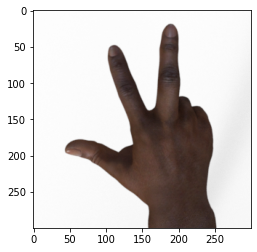

In [36]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

image = train_images[0].reshape(300, 300)

plt.imshow(rgb_image)
rgb_image.shape

In [37]:
# CONVERT PNG/JPG IMAGES TO NUMPY FORMAT

In [39]:
import imageio



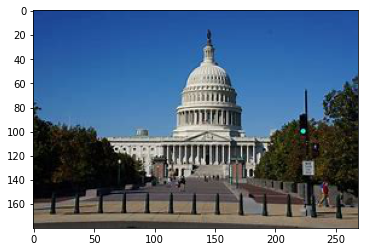

In [41]:
im = imageio.imread('https://th.bing.com/th/id/OIP.ujWpzp2OkLKkBuZ-nMVzpQHaE6?w=269&h=180&c=7&r=0&o=5&pid=1.7')
plt.imshow(im)

In [43]:
from imageio.core.util import asarray
print(type(im))
im_np = np.asarray(im)
print(im_np.shape)

<class 'imageio.core.util.Array'>
(180, 269, 3)
